# Image Analysis in Python Basics

**Daryna Yakymenko** <br> <br> 
27-07-2025

*Created for Biological Data Science Summer School, <br> Uzhhorod, Ukraine, July 19 - August 2, 2025*

## What is image data?

From the point of view of data storage technologies, images that we see on our computer's screen are multidimensional matrices of numbers - pixel intensities. <br>

Classic 2D image:<br> 

* (x, y) - where x, y are height and width of an image<br>
  
3D images:<br> 

* (x, y, z) -> z-stack<br> 
* (x, y, t) -> t = time lapse<br> 
* (x, y, c) -> c = channels (e.g. different colours)<br>
  
Multidimensional (ND) images:<br> 

* (x, y, c, z, t, ...)<br> 

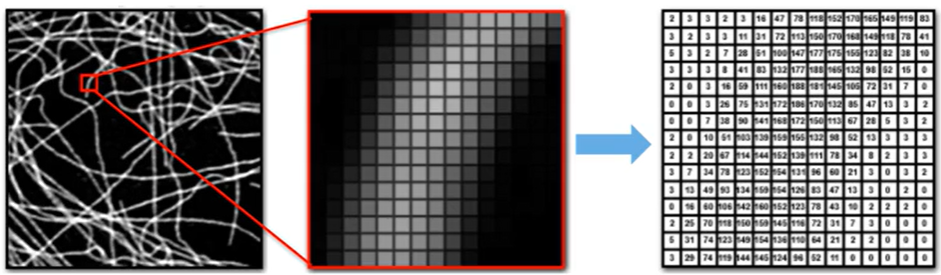

In [57]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [58]:
from skimage import data 

*Scikit-image (skimage)* itself has some datasets of preloaded data. E.g. below are shown some examples of scientific imaging data: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..4095].


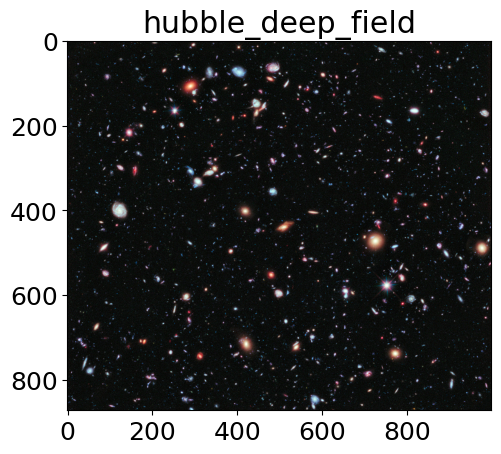

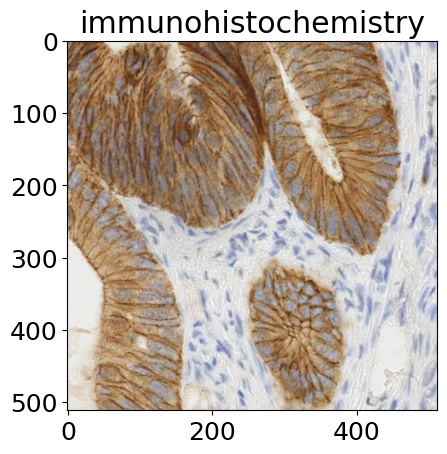

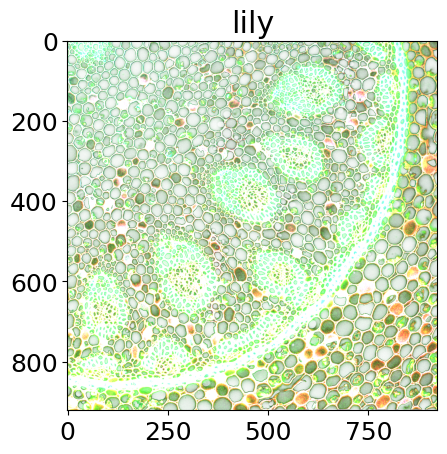

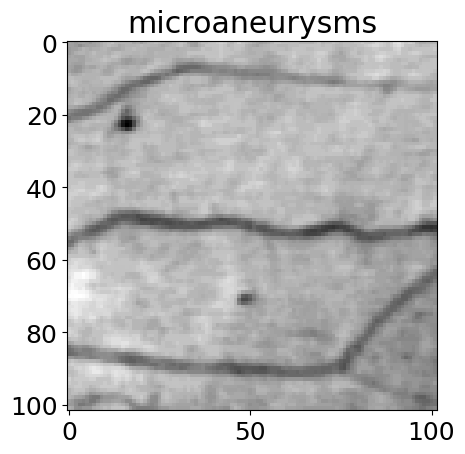

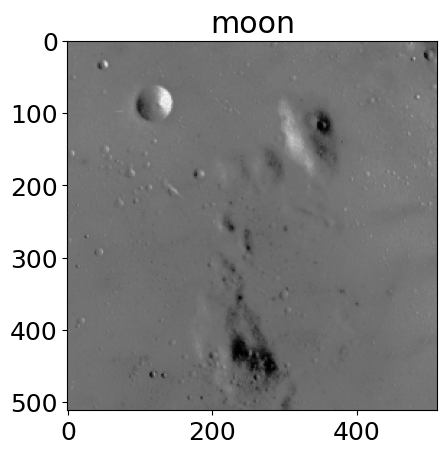

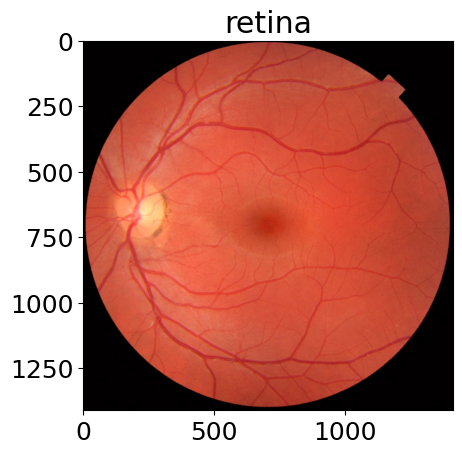

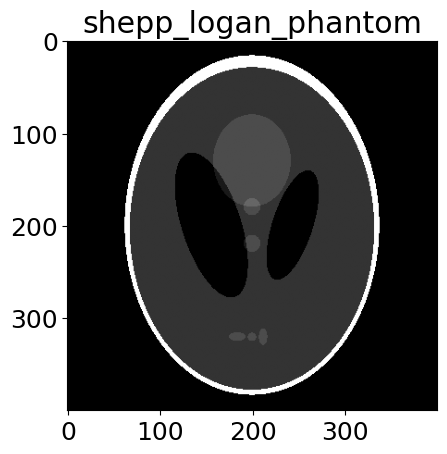

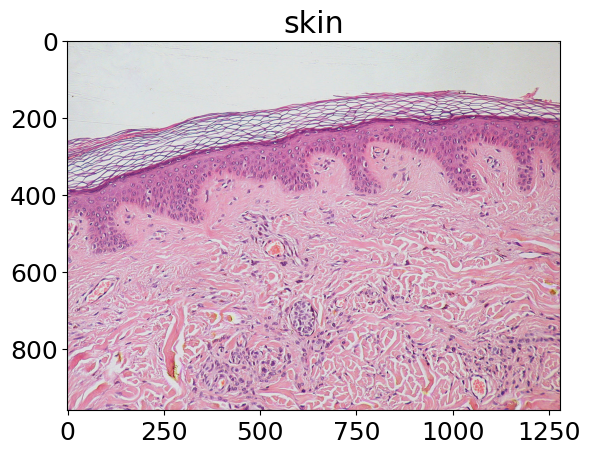

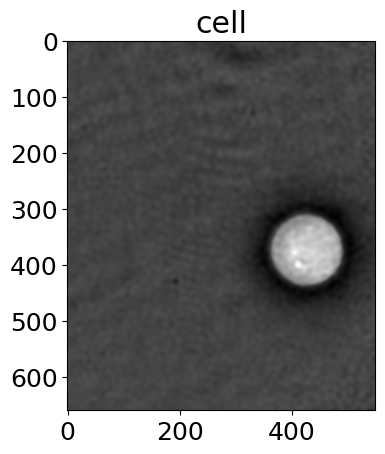

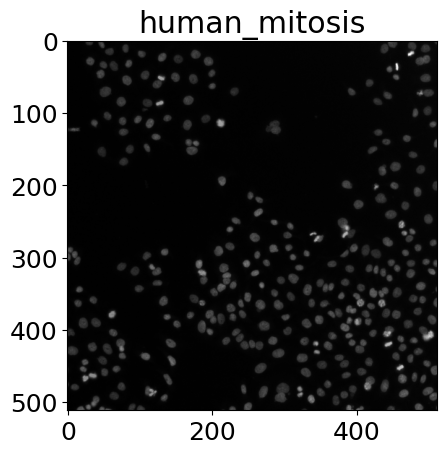

In [59]:
matplotlib.rcParams['font.size'] = 18

images = (
    'hubble_deep_field',
    'immunohistochemistry',
    'lily',
    'microaneurysms',
    'moon',
    'retina',
    'shepp_logan_phantom',
    'skin',
    'cell',
    'human_mitosis',
)


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

With *skimage*, we can also load in our own data: 

In [63]:
from skimage import io
my_image = io.imread('./data/Ctrl_150minEdU_SIII_Pos001_S003_5_C1.tif')

To check the dimensions of out image: 

In [64]:
print(my_image.shape) #here, the first value in (100, 512, 512) represent the number of slices (2D images) in z axis, and other values are for the height and the width of the image

(100, 512, 512)


To show data, we use *matplotlib* and commads given below: 

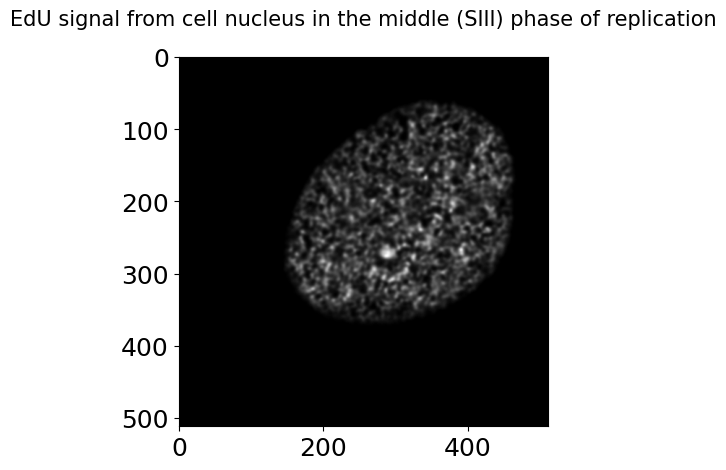

In [65]:
plt.figure()
plt.title("EdU signal from cell nucleus in the middle (SIII) phase of replication\n", fontsize = 15)
plt.imshow(my_image[50, :, :], cmap=plt.cm.gray) #we should specify 1 2D image from the stack of z=100. In this case, we choose an image nr 51
plt.show()

We can use different colormaps. The use of some of them can help to better highlight the difference in signal intensity in the image: 

In [13]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

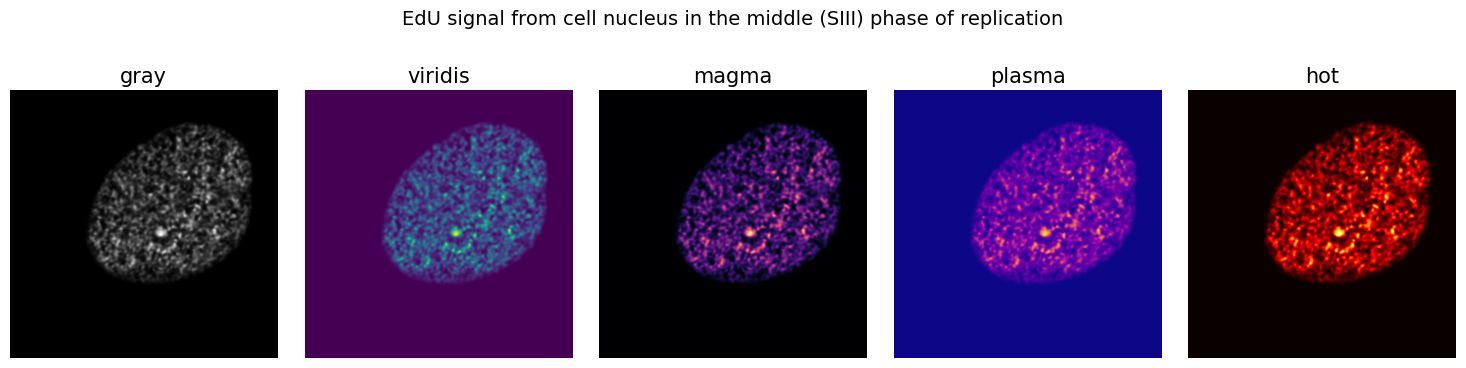

In [66]:
colormaps = ['gray', 'viridis', 'magma', 'plasma', 'hot']

#show few images near each other
fig, axes = plt.subplots(1, len(colormaps), figsize=(15, 4))
fig.suptitle("EdU signal from cell nucleus in the middle (SIII) phase of replication", fontsize=14)

for ax, cmap in zip(axes, colormaps):
    ax.imshow(my_image[50, :, :], cmap=cmap)
    ax.set_title(cmap, fontsize=15)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Image data dimensionality 

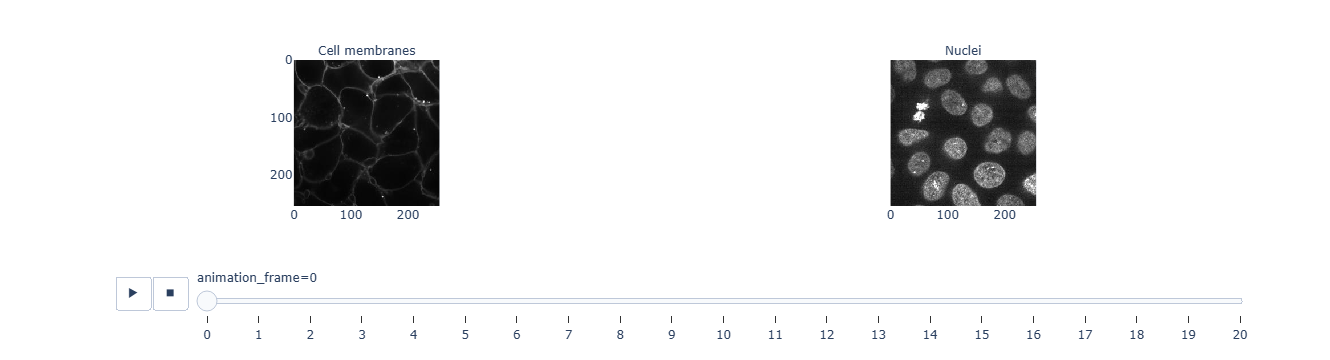

In [67]:
#from skimage import data
import plotly
import plotly.express as px
#import numpy as np

img = data.cells3d()[20:]

#omit some slices that are partially empty
img = img[5:26]

upper_limit = 1.5 * np.percentile(img, q=99)
img = np.clip(img, 0, upper_limit)

fig = px.imshow(
    img,
    facet_col=1,
    animation_frame=0,
    binary_string=True,
    binary_format="jpg",
)
fig.layout.annotations[0]["text"] = "Cell membranes"
fig.layout.annotations[1]["text"] = "Nuclei"
plotly.io.show(fig)

Ex.1. **Now try yourself! Try to create an animation for our previously loaded image**

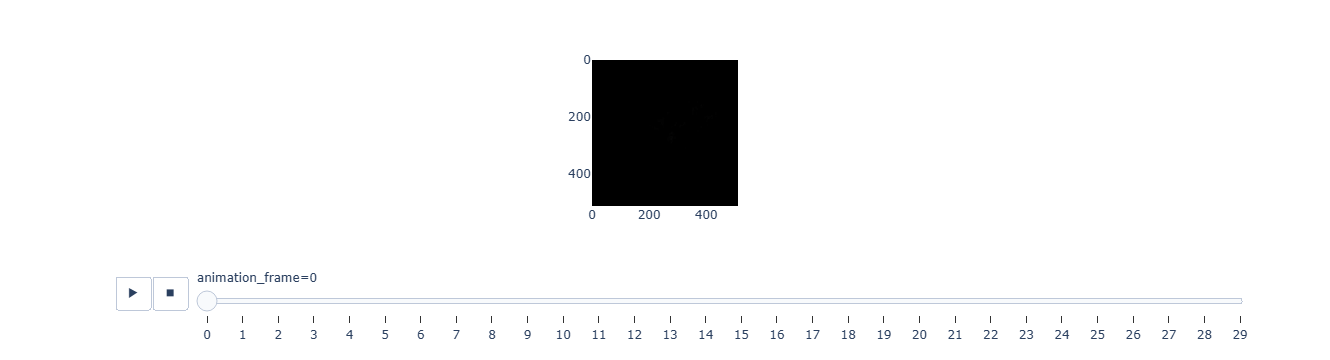

In [32]:
my_image3D = ...

Ex.2. **As the next step, please create an animation for all the 3 channels with the usage of appropriate color maps (EdU-Click as green (ch1), gH2AX as red (ch2) and 53BP1 as blue (ch3).**

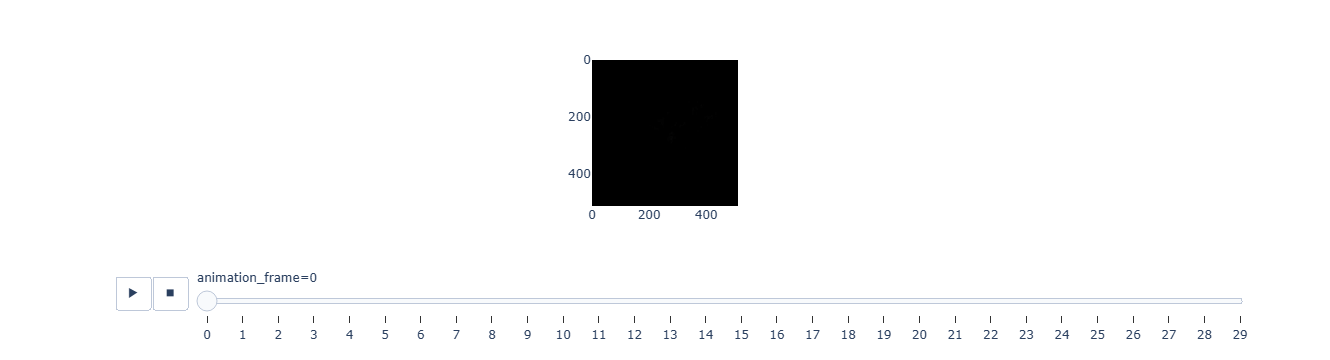

In [32]:
my_image3D = ...

## Basic operations on images

Slicing, masking and fancy indexing, in order to modify the pixel values of an image.

### Slice

In [157]:
#here we slice the image: we are choosing one plane from the one channel of data with (z, channels, x, y) dimensions
nuclei = data.cells3d()[38, 1, :, :]
nuclei.shape

(256, 256)

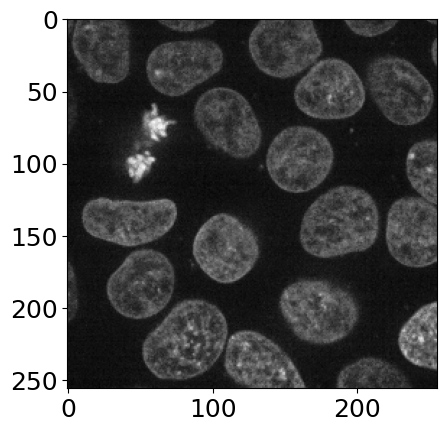

In [92]:
plt.imshow(nuclei, cmap="Grays_r")

### Histogram and CDF

In [87]:
#create a histogram to understand distribution of pixel brightness in an image

In [93]:
from skimage import exposure
from skimage import img_as_float

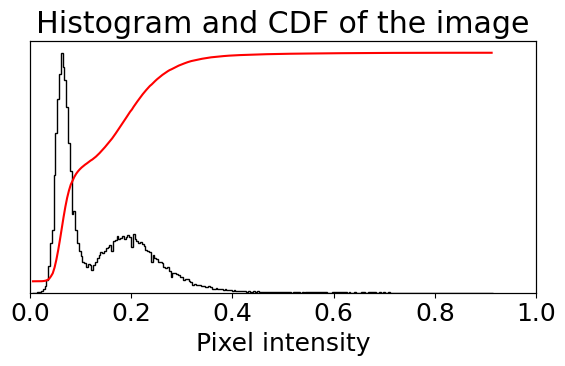

In [104]:
bins=256
image = img_as_float(nuclei) #our image

fig, ax_hist = plt.subplots(figsize=(6, 4))
ax_cdf = ax_hist.twinx()

# Display histogram
ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax_hist.set_xlabel('Pixel intensity')
ax_hist.set_xlim(0, 1)
ax_hist.set_yticks([])

# Display cumulative distribution
img_cdf, bins = exposure.cumulative_distribution(image, bins)
ax_cdf.plot(bins, img_cdf, 'r')
ax_cdf.set_yticks([])

plt.title('Histogram and CDF of the image')
plt.tight_layout()
plt.show()

- The histogram shows how many pixels have a given brightness.
- The CDF shows what percentage of pixels have a brightness up to a given level.

### Histogram correction
to improve contrast in images

In [105]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [106]:
matplotlib.rcParams['font.size'] = 8

In [120]:
#Contrast stretching => remove the darkest and lightest values
p2, p98 = np.percentile(nuclei, (2, 98)) #choose 2-98% range
img_rescale = exposure.rescale_intensity(nuclei, in_range=(p2, p98))

In [121]:
#Equalization => equalize CDF so the increase of the function was linear
img_eq = exposure.equalize_hist(nuclei)

In [122]:
#Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(nuclei, clip_limit=0.03)

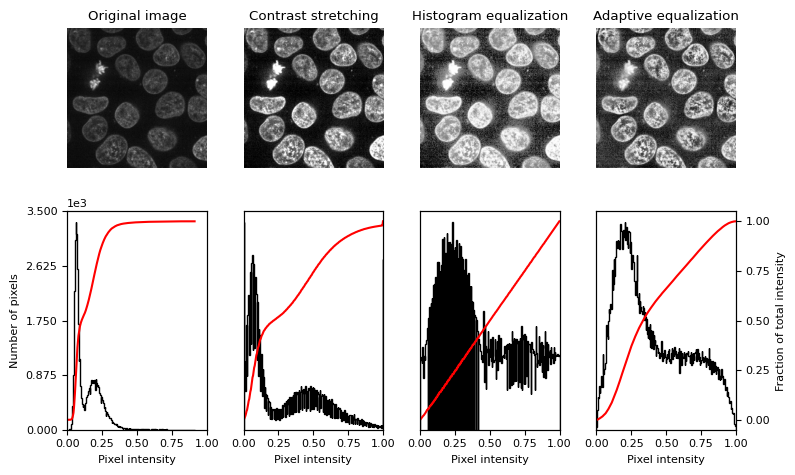

In [123]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(nuclei, axes[:, 0])
ax_img.set_title('Original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### Corrections for the contrast adjustment

In [147]:
# Gamma
gamma_corrected = exposure.adjust_gamma(nuclei, 0.5) 

In [151]:
# Logarithmic
logarithmic_corrected = exposure.adjust_log(nuclei, 2)

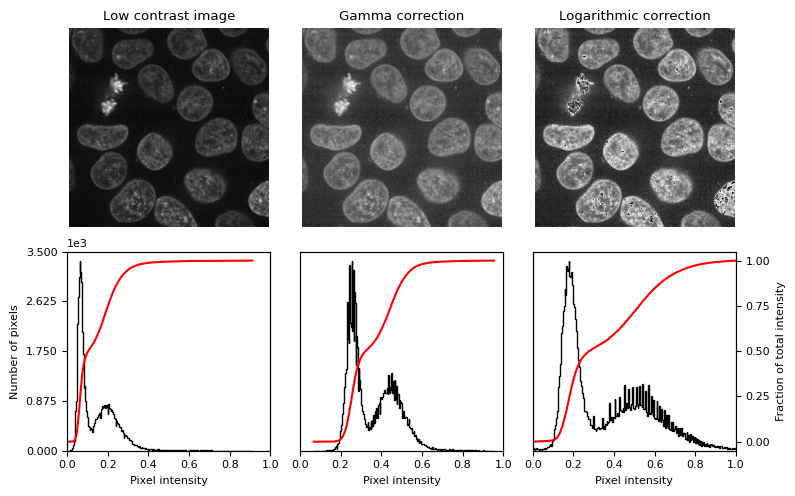

In [152]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(nuclei, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

Ex.3. **Try to perform contrast adjustment for data from our dataset. Experiment with different values of gamma and log factors. Note the difference.**

### Thresholding

...is used to create a binary image from a grayscale image

In [170]:
from skimage.filters import threshold_otsu

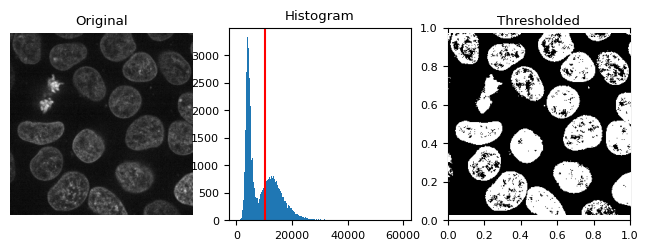

In [180]:
#nuclei = data.cells3d()[38, 1, :, :]
image = nuclei
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [181]:
from skimage.filters import try_all_threshold

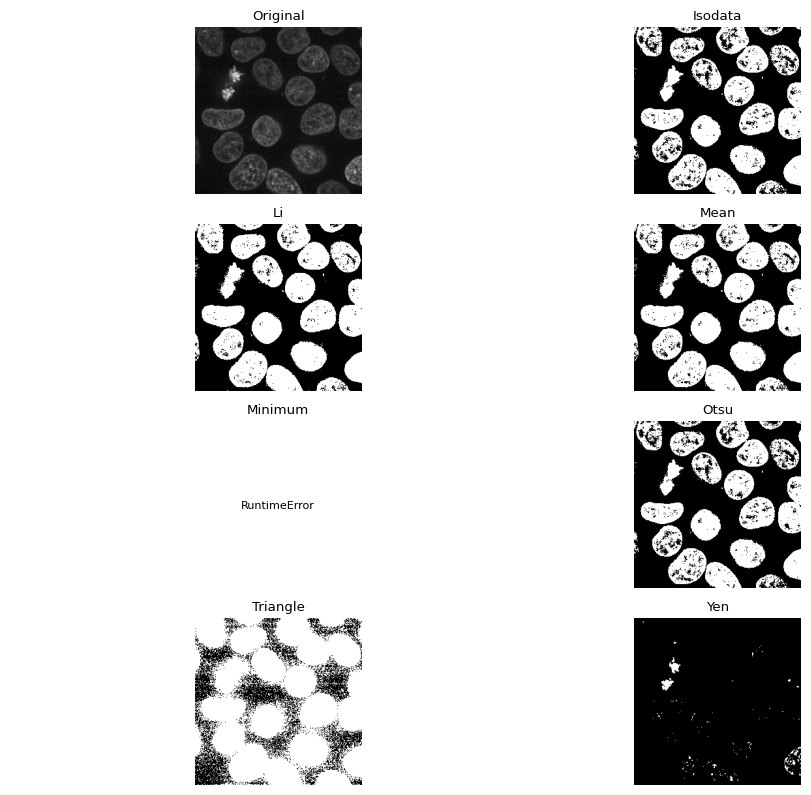

In [186]:
fig, ax = try_all_threshold(nuclei, figsize=(10, 8), verbose=False)
plt.show()

## Objects segmentation 

In [187]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

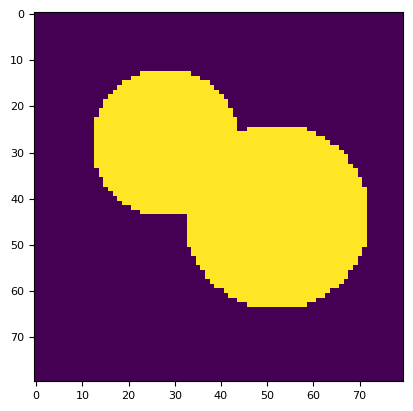

In [189]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1**2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imshow(image)

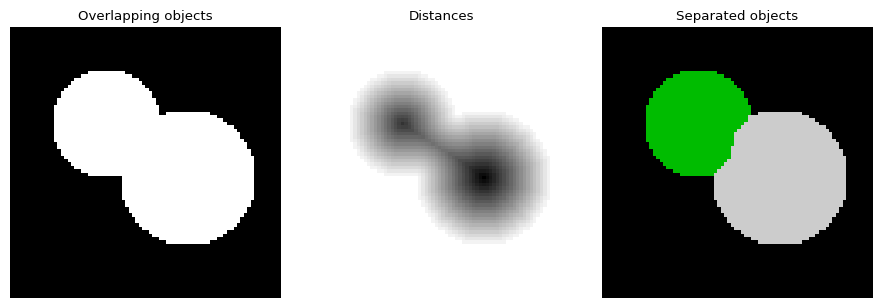

In [190]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

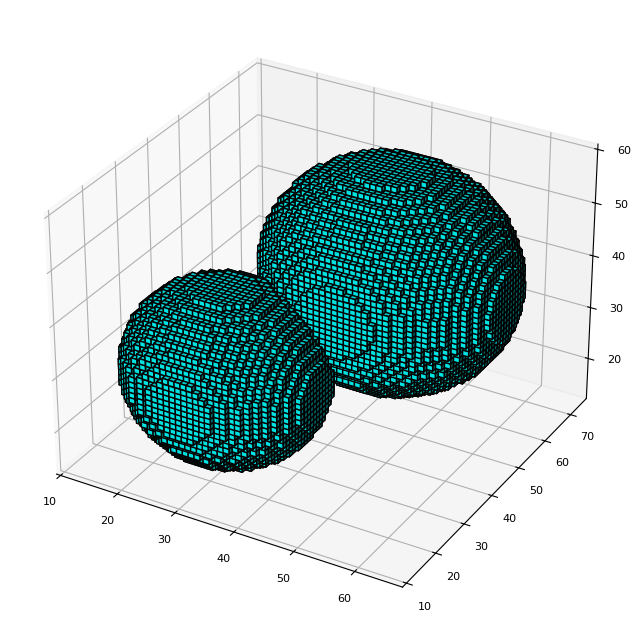

In [194]:
from mpl_toolkits.mplot3d import Axes3D

#3D dimensions
shape = (80, 80, 80)
x, y, z = np.indices(shape)

#Positions of the centres of the spheres
x1, y1, z1 = 28, 28, 28
x2, y2, z2 = 44, 52, 40

#Radia of the spheres
r1, r2 = 16, 20

#Masks
mask_sphere1 = (x - x1)**2 + (y - y1)**2 + (z - z1)**2 < r1**2
mask_sphere2 = (x - x2)**2 + (y - y2)**2 + (z - z2)**2 < r2**2

#Masks joining
image3d = np.logical_or(mask_sphere1, mask_sphere2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#Show as voxels
ax.voxels(image3d, facecolors='cyan', edgecolor='k')

plt.show()

In [ ]:
# distance transform
#distance = ndi.distance_transform_edt(image3d)

# local maxima
#coords = peak_local_max(
    distance,
    footprint=np.ones((3, 3, 3)),  # 3D sąsiedztwo
    labels=image3d)

# turn points into a mask
#mask = np.zeros(distance.shape, dtype=bool)
#mask[tuple(coords.T)] = True

#marker labelling
#markers, _ = ndi.label(mask)

#watershed in 3D
#labels = watershed(-distance, markers, mask=image3d)

Ex.4. **Try out thresholding and watershading for segmentation of foci in a given dataset.**

This example demonstrates the feature of histogram matching. It manipulates the pixels of an input image so that its histogram matches the histogram of the reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.

Histogram matching can be used as a lightweight normalisation for image processing, such as feature matching, especially in circumstances where the images have been taken from different sources or in different conditions (i.e. lighting).

In [ ]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

This example adjusts image contrast by performing a Gamma and a Logarithmic correction on the input image.

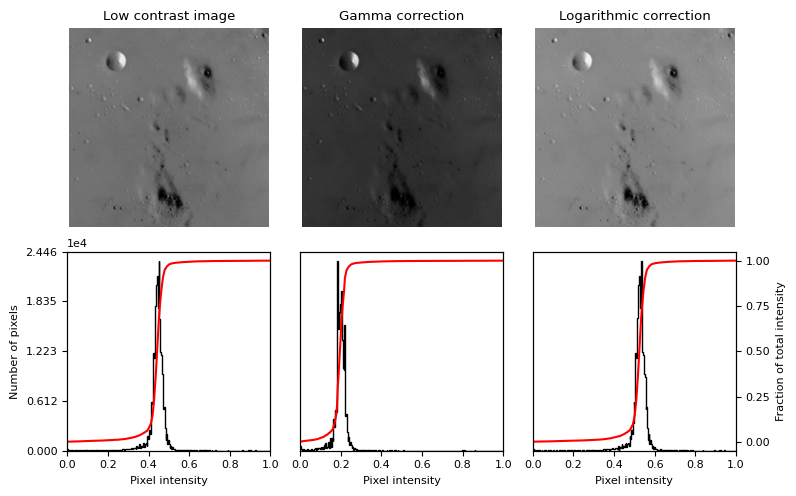

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

This examples enhances an image with low contrast, using a method called histogram equalization, which “spreads out the most frequent intensity values” in an image [1]. The equalized image has a roughly linear cumulative distribution function.

While histogram equalization has the advantage that it requires no parameters, it sometimes yields unnatural looking images. An alternative method is contrast stretching, where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles.

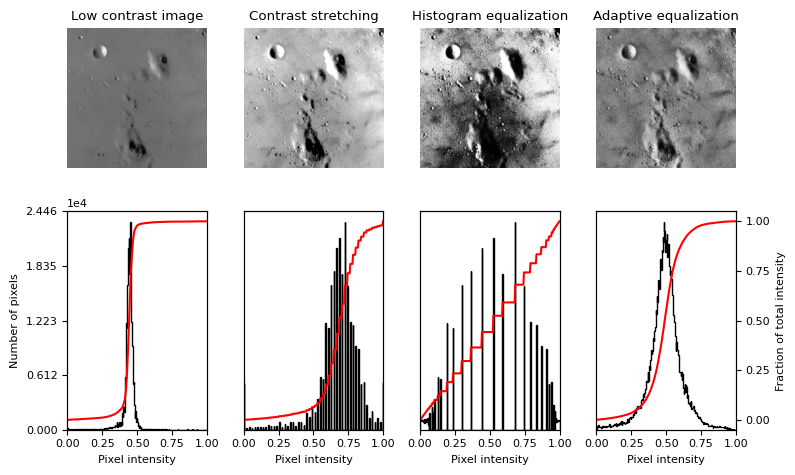

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [141]:
# Gamma
gamma_corrected = exposure.adjust_gamma(nuclei, 0.5)

In [142]:
# Logarithmic
logarithmic_corrected = exposure.adjust_log(nuclei, 3)

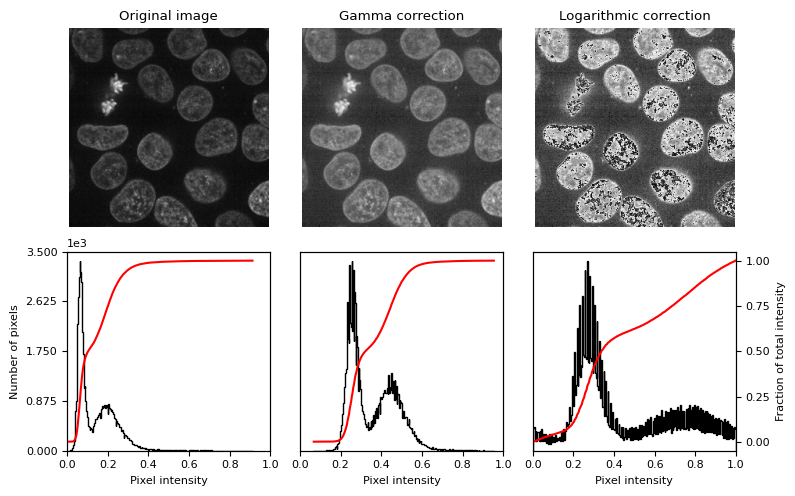

In [143]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(nuclei, axes[:, 0])
ax_img.set_title('Original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

###

This example enhances an image with low contrast, using a method called local histogram equalization, which spreads out the most frequent intensity values in an image.

The equalized image [1] has a roughly linear cumulative distribution function for each pixel neighborhood.

The local version [2] of the histogram equalization emphasized every local graylevel variations.

These algorithms can be used on both 2D and 3D images.

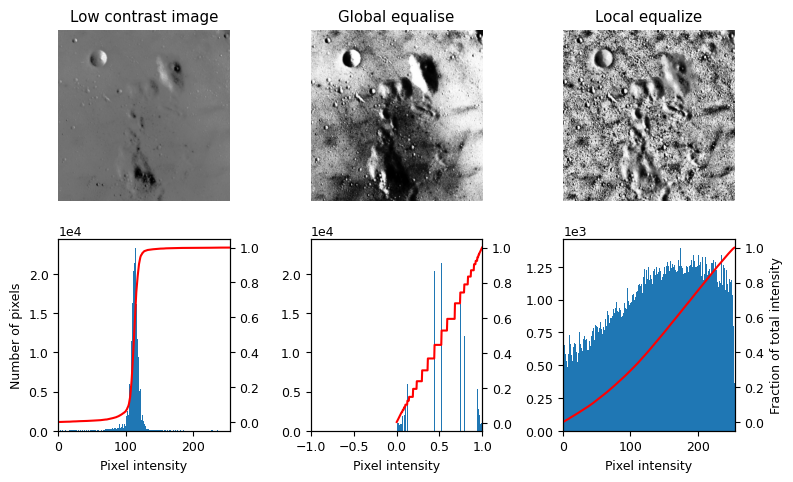

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

## Finding local maxima

The *peak_local_max* function => the coordinates of local peaks (maxima) in an image. 

- Internally, a maximum filter is used for finding local maxima.
- This operation dilates the original image and merges neighboring local maxima closer than the size of the dilation.
- Locations where the original image is equal to the dilated image are returned as local maxima.

In [ ]:
#from scipy import ndimage as ndi
#import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
#from skimage import data, img_as_float

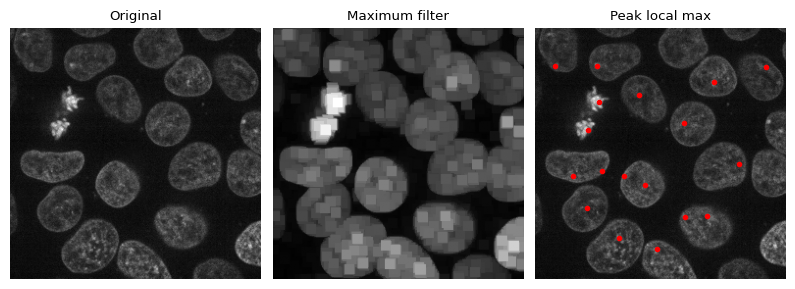

In [199]:
im = nuclei

# image_max is the dilation of im with a 10*10 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=10, mode = "nearest") #mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

Ex.5. **Find maxima of fluorescence in the studied sygnal channels. Are you able to find them in 2D planes/3D space? Could you quantificate them?**

## 

## Sources

https://scikit-image.org/docs/stable/auto_examples/ 

https://matplotlib.org/stable/users/explain/colors/colormaps.html 

https://www.oncotarget.com/article/10411/text/